# 라이브러리 로드 및 데이터 불러오기

## 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns;
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

## 데이터 불러오기

In [2]:
df = pd.read_csv("data/Data_preprocess.csv")
df.head()

,Unnamed: 0,Gender,Age,School,New Media Utlz,Media Utlz,Community Utlz,Privacy,Literacy
0,0,1,6,5,5.171429,4.808511,2.785714,4.375,2.864865
1,1,2,5,5,7.142857,4.255319,2.714286,4.000,3.324324
2,2,2,3,5,6.971429,4.638298,2.785714,4.250,3.270270
3,3,1,3,5,5.542857,4.212766,2.357143,4.250,3.189189
4,4,1,6,5,4.571429,4.808511,3.071429,4.375,2.864865


## 데이터 정보

In [3]:
media = df.iloc[:, 1:]    # 인덱스 col 제외한 나머지 데이터
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4528 non-null   int64  
 1   Age             4528 non-null   int64  
 2   School          4528 non-null   int64  
 3   New Media Utlz  4528 non-null   float64
 4   Media Utlz      4528 non-null   float64
 5   Community Utlz  4528 non-null   float64
 6   Privacy         4528 non-null   float64
 7   Literacy        4528 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 283.1 KB


총 4528개의 데이터(rows), 8개의 열(columns) -> 1개의 종속변수, 7개의 설명변수

## 각 변수별 기술통계량

In [4]:
media.describe()

,Gender,Age,School,New Media Utlz,Media Utlz,Community Utlz,Privacy,Literacy
count,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000,4528.000000
mean,1.530256,4.346731,4.556758,4.921012,4.089754,1.450530,3.798973,3.120320
std,0.499139,1.521485,0.660577,1.732598,0.776125,0.814148,0.856788,0.500809
min,1.000000,2.000000,2.000000,1.428571,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,4.000000,3.600000,3.680851,1.000000,3.250000,2.783784
50%,2.000000,4.000000,5.000000,4.885714,4.212766,1.000000,4.000000,3.135135
75%,2.000000,6.000000,5.000000,6.142857,4.723404,1.571429,4.500000,3.459459
max,2.000000,8.000000,6.000000,9.000000,5.000000,6.000000,5.000000,4.594595


# 데이터 시각화 및 탐색

## 히스토그램을 통한 반응변수 분포 확인

<AxesSubplot:xlabel='Literacy', ylabel='Count'>

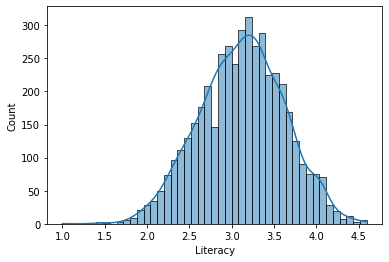

In [5]:
sns.histplot(media["Literacy"], kde=True)

## 히스토그램을 통한 전체 변수 분포 확인

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


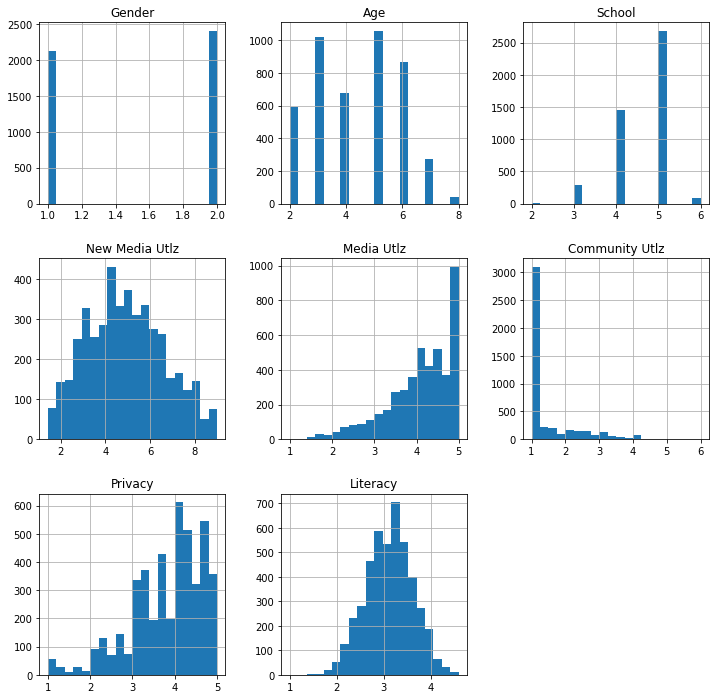

In [6]:
h = media.hist(figsize=(12, 12), bins=20)

## 산점도 행렬을 통한 변수 간 주변관계 확인

### 모든 변수를 이용한 산점도 행렬

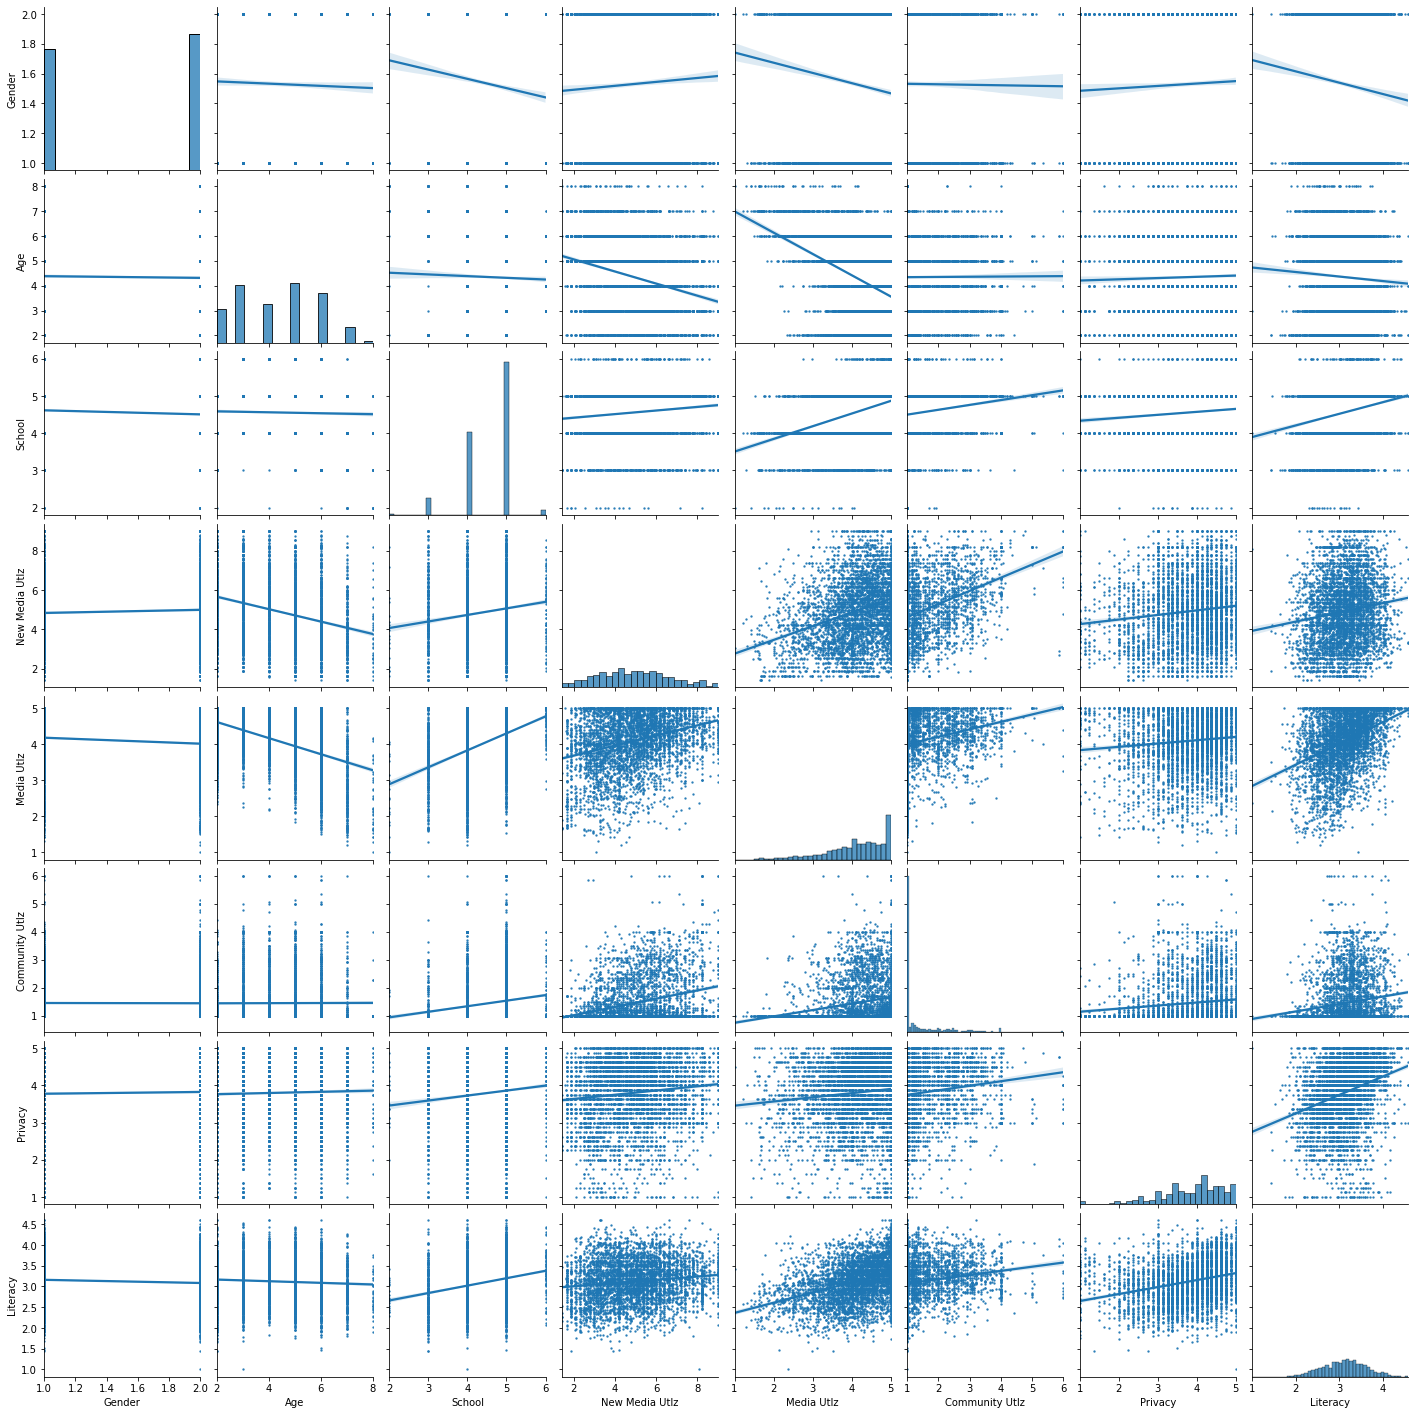

In [7]:
sns.pairplot(media, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()

성별/나이/학력은 범주형 변수로써, scatter plot으로 관계를 파악하기에는 어려움이 있다.  
따라서 나머지 변수들로만 다시 그래프를 그린다

### 연속형 변수만을 사용한 산점도 행렬

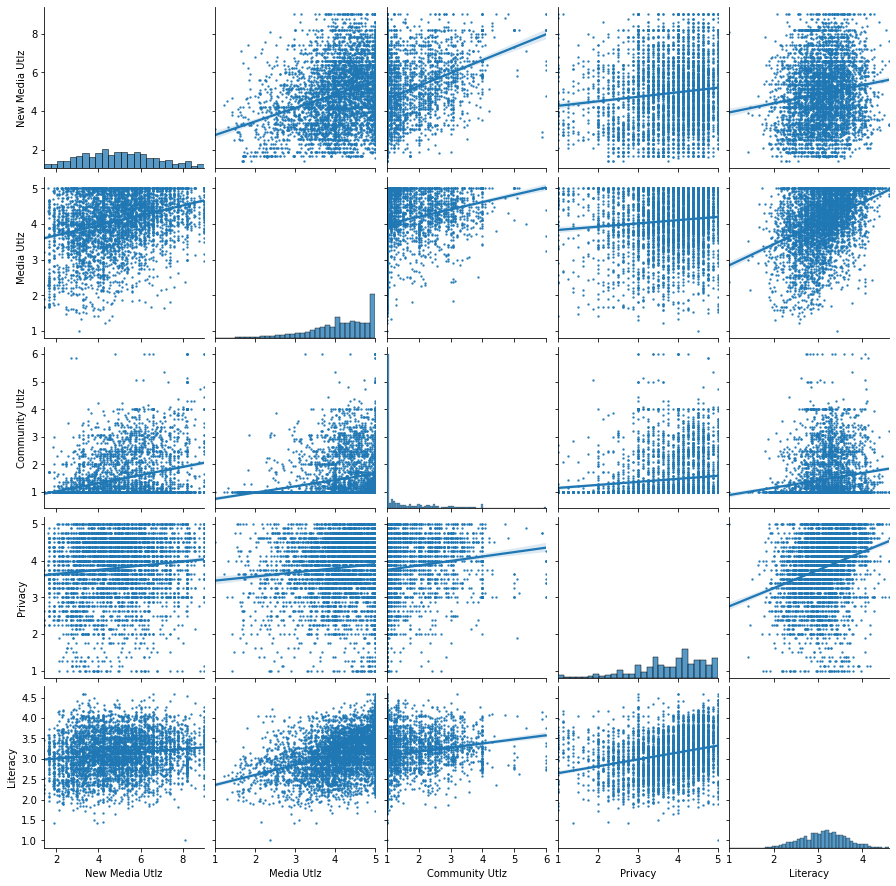

In [8]:
sns.pairplot(media.iloc[:, 3:], aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()

: 각 변수간 주변관계를 확인 가능  
  하지만, 관측치가 매우 많기 때문에 산점도만으로는 데이터의 분포를 확인하는데 어려움이 있다

### 데이터를 이용한 kde(kernal density estimation) 그래프 그리기

참고 : https://en.wikipedia.org/wiki/Kernel_density_estimation

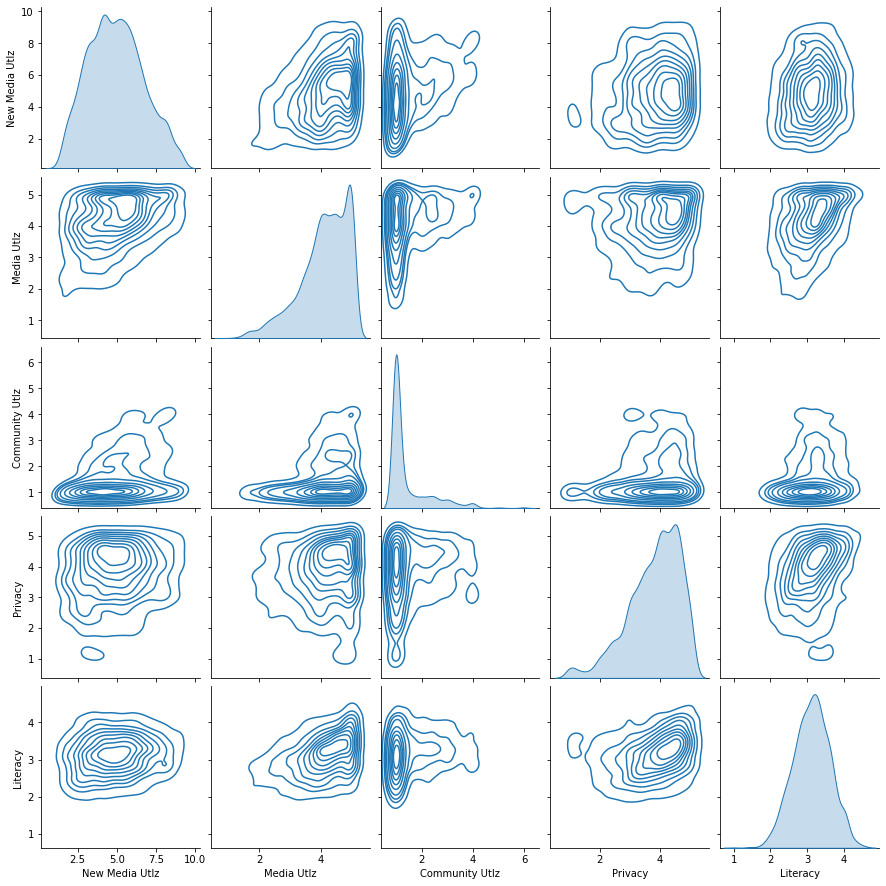

In [9]:
sns.pairplot(media.iloc[:, 3:], aspect=1, kind="kde")
plt.show()

: 추정된 2차원 확률밀도함수로 데이터의 분포를 확인할 수 있다

## 변수간 상관계수 확인

<AxesSubplot:>

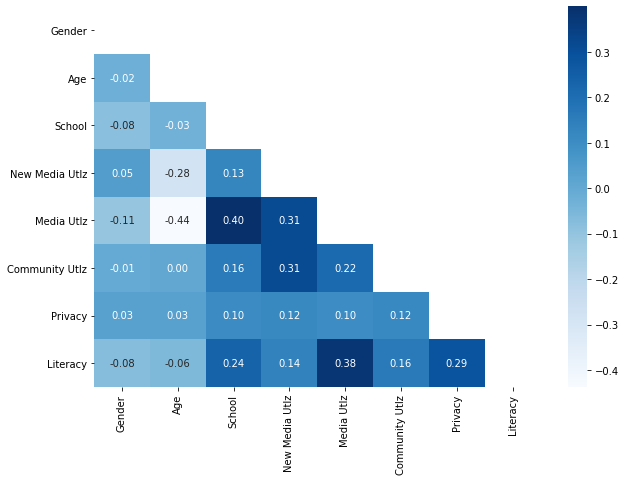

In [10]:
mask = np.triu(np.ones_like(media.corr(), dtype=bool))
plt.figure(figsize=(10, 7))
sns.heatmap(media.corr(), mask=mask, annot=True, fmt=".2f", cmap="Blues")

# 모델 적합 및 가설 검정

## 전체 설명변수 적합(H0 : B1 = B2 = ... = Bp=0에 대한 가설검정)

In [11]:
target = media[['Literacy']]
target.head()   # 반응변수 데이터

,Literacy
0,2.864865
1,3.324324
2,3.270270
3,3.189189
4,2.864865


In [12]:
x_data1 = media.iloc[:, :7]
x_data1.head()   # 설명변수 데이터

,Gender,Age,School,New Media Utlz,Media Utlz,Community Utlz,Privacy
0,1,6,5,5.171429,4.808511,2.785714,4.375
1,2,5,5,7.142857,4.255319,2.714286,4.000
2,2,3,5,6.971429,4.638298,2.785714,4.250
3,1,3,5,5.542857,4.212766,2.357143,4.250
4,1,6,5,4.571429,4.808511,3.071429,4.375


In [13]:
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sun, 16 May 2021   Prob (F-statistic):          9.27e-244
Time:                        10:28:25   Log-Likelihood:                -2718.2
No. Observations:                4528   AIC:                             5452.
Df Residuals:                    4520   BIC:                             5504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3237      0.069     19.174      0.000       1.188       1.459
Gender            -0.0376      0.013     -2.822      0.005      -0.064      -0.011
Age                0.0298      0.005      5.924      0.000       0.020       0.040
School             0.0457      0.011      4.138      0.000       0.024       0.067
New Media Utlz     0.0001      0.004      0.026      0.979      -0.008       0.008
Media Utlz         0.2303      0.011     21.302      0.000       0.209       0.252
Community Utlz     0.0296      0.009      3.393      0.001       0.012       0.047
Privacy            0.1398      0.008     17.932      0.000       0.124       0.155
==============================================================================
Omnibus:                        5.182   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.181
Skew:                          -0.083   Prob(JB):                       0.0750
Kurtosis:                       2.999   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0 : B1 = B2 = ... = Bp에 대한 F 통계량 : 186.7, p-vale : 0.000 -> H0 기각

## RM1 : 뉴미디어 활용 수준 제거(H0 : B4 = 0에 대한 가설검정)

### 모델 적합

In [14]:
x_data2 = x_data1[['Gender', 'Age', 'School', 'Media Utlz', 'Community Utlz', 'Privacy']]
x_data2_1 = sm.add_constant(x_data2, has_constant="add")
model2 = sm.OLS(target, x_data2_1)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 16 May 2021   Prob (F-statistic):          6.02e-245
Time:                        10:28:25   Log-Likelihood:                -2718.2
No. Observations:                4528   AIC:                             5450.
Df Residuals:                    4521   BIC:                             5495.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3240      0.068     19.453      0.000       1.191       1.457
Gender            -0.0375      0.013     -2.826      0.005      -0.064      -0.011
Age                0.0297      0.005      6.046      0.000       0.020       0.039
School             0.0457      0.011      4.139      0.000       0.024       0.067
Media Utlz         0.2303      0.011     21.508      0.000       0.209       0.251
Community Utlz     0.0296      0.008      3.545      0.000       0.013       0.046
Privacy            0.1398      0.008     17.992      0.000       0.125       0.155
==============================================================================
Omnibus:                        5.191   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.190
Skew:                          -0.083   Prob(JB):                       0.0747
Kurtosis:                       2.999   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SSE(FM) 계산

In [15]:
fitted1 = fitted_model1.predict(x_data1_1)
fm_sse = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    fm_sse += (fitted1[i] - target_val[i])**2
fm_sse

880.7571756606765

### SSE(RM1) 계산

In [16]:
fitted2 = fitted_model2.predict(x_data2_1)
rm_sse1 = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    rm_sse1 += (fitted2[i] - target_val[i])**2
rm_sse1

880.7573086692873

### F값 계산

In [17]:
from scipy.stats import f
F_stats = ((rm_sse1-fm_sse)/1)/(fm_sse/(media.shape[0]-8))   # media.shape[0] : 데이터의 row 개수
F_stats

0.0006825932706120601

### P-value(F값) 계산

In [18]:
f_dist = f(1, media.shape[0]-8)
1-f_dist.cdf(F_stats)

0.9791576048423403

H0 채택, 뉴미디어 활용수준을 제거해도 설명력에 유의미한 감소 존재하지 않음

## RM2 : B2(Age) = B6(Community Utlz)  
H0 : B2 = B6 | (B4 = 0) vs H1 : B2 ≠ B6 | (B4 = 0)에 대한 가설검정

### 모델 적합

In [19]:
x_data3 = x_data1[['Gender', 'School', 'Media Utlz', 'Privacy']]
new_variable = x_data1.copy()['Age'] + x_data1.copy()['Community Utlz']
x_data3.insert(1, 'Age + Com Utlz', new_variable)
x_data3_1 = sm.add_constant(x_data3, has_constant="add")
model3 = sm.OLS(target, x_data3_1)
fitted_model3 = model3.fit()
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     261.5
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.54e-246
Time:                        10:28:25   Log-Likelihood:                -2718.2
No. Observations:                4528   AIC:                             5448.
Df Residuals:                    4522   BIC:                             5487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3243      0.065     20.306      0.000       1.196       1.452
Gender            -0.0375      0.013     -2.832      0.005      -0.064      -0.012
Age + Com Utlz     0.0297      0.004      7.331      0.000       0.022       0.038
School             0.0457      0.011      4.142      0.000       0.024       0.067
Media Utlz         0.2303      0.010     23.353      0.000       0.211       0.250
Privacy            0.1398      0.008     18.006      0.000       0.125       0.155
==============================================================================
Omnibus:                        5.188   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.187
Skew:                          -0.083   Prob(JB):                       0.0748
Kurtosis:                       2.999   Cond. No.                         95.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SSE(RM2) 계산

In [20]:
fitted3 = fitted_model3.predict(x_data3_1)
rm_sse2 = 0
target_val = media['Literacy']
for i in range(target_val.shape[0]):
    rm_sse2 += (fitted3[i] - target_val[i])**2
rm_sse2

880.7573334642958

### f값 계산

In [21]:
from scipy.stats import f
F_stats = ((rm_sse2-rm_sse1)/1)/(rm_sse1/(media.shape[0]-7))   # media.shape[0] : 데이터의 row 개수
F_stats 

0.00012727482610177661

### P-value(F값 계산)

In [22]:
f_dist = f(1, media.shape[0]-7)
1-f_dist.cdf(F_stats)

0.9909992626693581

H0 채택, Age와 Community Utlz를 동일한 변수로 가정해도 설명력에 유의미한 감소 존재하지 않음

# 회귀 진단

## 잔차그래프

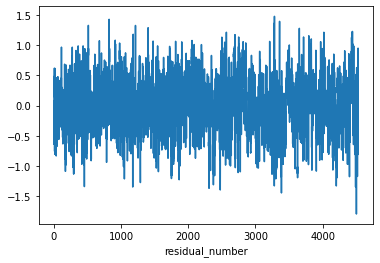

In [23]:
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

## 잔차의 정규성 검증 - Normal qq plot

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


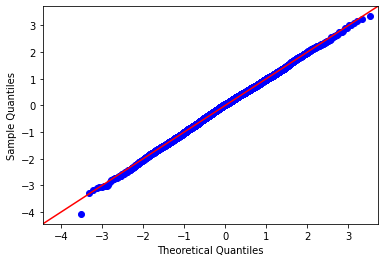

In [24]:
res = fitted_model3.resid
fig = sm.qqplot(res, fit=True, line='45')
ax.pl

## 잔차의 선형성, 등분산성 검증 - 잔차 산점도

Text(0, 0.5, 'Residual')

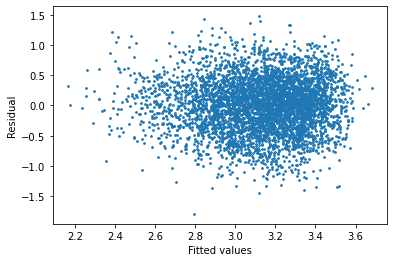

In [25]:
pred_y = fitted_model3.predict(x_data3_1)
fig = plt.scatter(pred_y, res, s=3)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

: X축은 적합값으로, Y축은 잔차로 두고 그린 산점도 그래프